In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
import pickle
% matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = open("../../data/features/2019_05_15_features_finally.pickle",'rb')
df = pickle.load(file, encoding='utf-8')
df.columns

Index(['id', 'Datetime', 'text', 'sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Volume_perc', 'Trading_Hour'],
      dtype='object')

In [3]:
df.shape

(749, 28)

In [4]:
print(df.isnull().sum())

id                      0
Datetime                0
text                    0
sentiment               0
subjectivity            0
isreply                 0
year                    0
month                   0
day                     0
date                    0
DayofWeek               0
Weekend                 0
Time                    0
BinaryTrading           0
DayDistance             0
gtrend                  0
CommentSentimental      0
CommentSubjectivity     0
countComment            0
posCommentSum           0
negCommentSum           0
CommentSD               0
posCommentSD            0
negCommentSD            0
negCommentPercent       0
posCommentPercent       0
Volume_perc            29
Trading_Hour           29
dtype: int64


In [5]:
df = df[df['Volume_perc'].isnull() == False]

In [7]:
df.shape

(720, 28)

In [8]:
df

,id,Datetime,text,sentiment,subjectivity,isreply,year,month,day,date,...,countComment,posCommentSum,negCommentSum,CommentSD,posCommentSD,negCommentSD,negCommentPercent,posCommentPercent,Volume_perc,Trading_Hour
29,1112123741574586368,2019-03-30 22:45:00+00:00,we’ve been so mired in production & logistics ...,-0.025000,0.225000,0,2019,3,30,2019-03-30,...,1635,181.046184,-36.849299,0.244820,0.238605,0.224317,0.092355,0.304587,0.143334,5.0
30,1112106548363292672,2019-03-30 21:37:00+00:00,tesla semi delivering tesla carspic.twitter.co...,0.000000,0.000000,0,2019,3,30,2019-03-30,...,998,115.902111,-21.898603,0.253292,0.242533,0.240379,0.081162,0.301603,0.317909,1.0
31,1112036985504317442,2019-03-30 17:00:00+00:00,"amazing work by tesla delivery teams, especial...",0.182292,0.608333,0,2019,3,30,2019-03-30,...,321,44.390798,-8.188405,0.269115,0.258929,0.184834,0.112150,0.383178,0.065274,6.0
32,1111788218142216192,2019-03-30 00:32:00+00:00,retrofits will start when our software is able...,0.295833,0.419792,1,2019,3,30,2019-03-30,...,490,60.349110,-9.847427,0.229875,0.211034,0.215596,0.106122,0.420408,0.094553,7.0
33,1111762533520531456,2019-03-29 22:50:00+00:00,anyone who purchased full self-driving will ge...,0.155000,0.461667,0,2019,3,29,2019-03-29,...,359,40.492307,-8.223304,0.223112,0.201338,0.215351,0.111421,0.398329,0.326037,1.0
34,1111001632731389952,2019-03-27 20:26:00+00:00,super proud of tesla autopilot team!,0.666667,0.833333,1,2019,3,27,2019-03-27,...,86,17.803204,-1.025000,0.298376,0.279697,0.086796,0.093023,0.500000,0.326037,1.0
35,1110632394611015681,2019-03-26 19:59:00+00:00,i think so. for sure worth giving it our best ...,0.233333,0.359877,1,2019,3,26,2019-03-26,...,842,90.909926,-21.583804,0.221554,0.191146,0.223208,0.119952,0.382423,0.326037,1.0
36,1110576683411628032,2019-03-26 16:18:00+00:00,hard to appreciate how much tesla autopilot im...,-0.045833,0.370833,1,2019,3,26,2019-03-26,...,304,43.359616,-7.845460,0.238042,0.190385,0.201954,0.134868,0.476974,0.326037,1.0
37,1110368897151066114,2019-03-26 02:32:00+00:00,"ford has 4 ceos in 5 years & nobody blinks, bu...",-0.150000,0.050000,1,2019,3,26,2019-03-26,...,2158,206.738652,-50.057119,0.211889,0.203128,0.189100,0.122799,0.330399,0.326037,1.0
38,1109901209446416385,2019-03-24 19:34:00+00:00,every car company is constantly changing price...,0.000000,0.333333,1,2019,3,24,2019-03-24,...,1075,104.795338,-17.476635,0.202355,0.202114,0.140883,0.106047,0.316279,0.326037,1.0


In [9]:
df.columns

Index(['id', 'Datetime', 'text', 'sentiment', 'subjectivity', 'isreply',
       'year', 'month', 'day', 'date', 'DayofWeek', 'Weekend', 'Time',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment', 'posCommentSum', 'negCommentSum',
       'CommentSD', 'posCommentSD', 'negCommentSD', 'negCommentPercent',
       'posCommentPercent', 'Volume_perc', 'Trading_Hour'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 29 to 748
Data columns (total 28 columns):
id                     720 non-null object
Datetime               720 non-null datetime64[ns, UTC]
text                   720 non-null object
sentiment              720 non-null float64
subjectivity           720 non-null float64
isreply                720 non-null int64
year                   720 non-null int64
month                  720 non-null int64
day                    720 non-null int64
date                   720 non-null object
DayofWeek              720 non-null int64
Weekend                720 non-null bool
Time                   720 non-null object
BinaryTrading          720 non-null int64
DayDistance            720 non-null int64
gtrend                 720 non-null int64
CommentSentimental     720 non-null float64
CommentSubjectivity    720 non-null float64
countComment           720 non-null int64
posCommentSum          720 non-null float64
negCommentSum          720 

In [11]:
df['Weekend'] = df['Weekend'].astype(int)

In [12]:
# prepare X and Y

X = df[['sentiment', 'subjectivity', 'isreply',
       'DayofWeek', 'Weekend',
       'BinaryTrading', 'DayDistance', 'gtrend', 'CommentSentimental',
       'CommentSubjectivity', 'countComment',  'posCommentSum',
       'negCommentSum', 'CommentSD', 'posCommentSD', 'negCommentSD',
       'negCommentPercent', 'posCommentPercent', 'Trading_Hour']]

Y = df['Volume_perc']

In [13]:
num_features = len(X.columns)

In [14]:
num_features

19

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(576, 19) (576,)
(144, 19) (144,)


### 1. Linear Regression

In [33]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

print("Linear Reg R^2 training is: {}".format(linear_reg.score(X_train, Y_train)))
print("Linear Reg R^2 testing is: {}".format(linear_reg.score(X_test, Y_test)))
print("Linear Reg Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, linear_reg.predict(X_train)))))
print("Linear Reg Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, linear_reg.predict(X_test)))))

Linear Reg R^2 training is: 0.44715687468762366
Linear Reg R^2 testing is: 0.33700581606385716
Linear Reg Train RMSE is: 0.09053042028103529
Linear Reg Test RMSE is: 0.10409711863387684


### 2a. Simple Random Forest

In [34]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)     # instantiate
random_forest.fit(X_train, Y_train)                         # fit

print("Random Forest R^2 training is: {}".format(random_forest.score(X_train, Y_train)))                
print("Random Forest R^2 testing is: {}".format(random_forest.score(X_test, Y_test)))  
print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, random_forest.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, random_forest.predict(X_test)))))

Random Forest R^2 training is: 0.9245272095394196
Random Forest R^2 testing is: 0.4598497982007094
Random Forest Train RMSE is: 0.033449434780697625
Random Forest Test RMSE is: 0.09395959164103314


### 2b. Random Forest with Cross Validation

In [35]:
rf_cv = RandomForestRegressor(n_estimators=500, max_depth=20, max_features=np.sqrt(num_features), random_state=10)

# create the hyperparameter grid
param_dist = {'n_estimators': sp_randint(50, 500),
              'max_features': sp_randint(4, 15),
              'max_depth': sp_randint(10,30)}

In [36]:
rf_grid = RandomizedSearchCV(estimator = rf_cv, 
                             param_distributions = param_dist,
                             n_iter = 10,
                             cv = 5, 
                             verbose=2,
                             n_jobs = -1)
# fit the grid search model
rf_grid.fit(X_train, Y_train)

# best hyperparameters
rf_grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_depth=17, max_features=8, n_estimators=188 ..................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... max_depth=17, max_features=8, n_estimators=188, total=   0.4s
[CV] max_depth=17, max_features=8, n_estimators=188 ..................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ... max_depth=17, max_features=8, n_estimators=188, total=   0.4s
[CV] max_depth=17, max_features=8, n_estimators=188 ..................
[CV] ... max_depth=17, max_features=8, n_estimators=188, total=   0.4s
[CV] max_depth=17, max_features=8, n_estimators=188 ..................
[CV] ... max_depth=17, max_features=8, n_estimators=188, total=   0.4s
[CV] max_depth=17, max_features=8, n_estimators=188 ..................
[CV] ... max_depth=17, max_features=8, n_estimators=188, total=   0.4s
[CV] max_depth=17, max_features=5, n_estimators=222 ..................
[CV] ... max_depth=17, max_features=5, n_estimators=222, total=   0.4s
[CV] max_depth=17, max_features=5, n_estimators=222 ..................
[CV] ... max_depth=17, max_features=5, n_estimators=222, total=   0.3s
[CV] max_depth=17, max_features=5, n_estimators=222 ..................
[CV] ... max_depth=17, max_features=5, n_estimators=222, total=   0.4s
[CV] max_depth=17, max_features=5, n_estimators=222 ..................
[CV] .

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.4s finished


{'max_depth': 17, 'max_features': 8, 'n_estimators': 188}

In [ ]:
#rf_grid.cv_results_

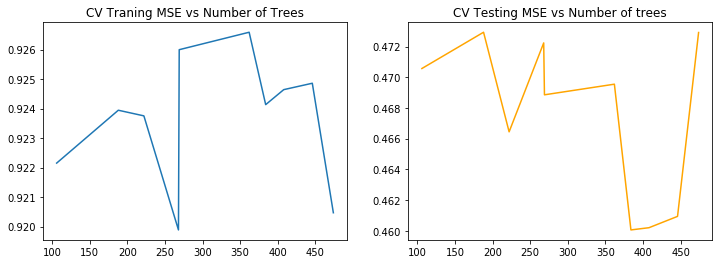

In [37]:
ntrees_cv = list(rf_grid.cv_results_['param_n_estimators'].data)
df_ntrees_cv = pd.DataFrame(list(zip(ntrees_cv, rf_grid.cv_results_['mean_train_score'], rf_grid.cv_results_['mean_test_score'])), 
             columns=['ntree','mean_train_score','mean_test_score']).sort_values('ntree')

plt.subplots(figsize=(12, 4))
plt.subplot(121)

ax1=plt.subplot(1, 2, 1)
plt.plot(df_ntrees_cv['ntree'], df_ntrees_cv['mean_train_score'])
plt.title('CV Traning MSE vs Number of Trees');

ax1=plt.subplot(1, 2, 2)
plt.plot(df_ntrees_cv['ntree'], df_ntrees_cv['mean_test_score'], color = "orange")
plt.title('CV Testing MSE vs Number of trees');

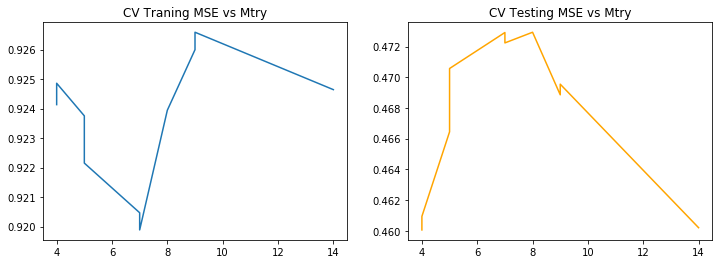

In [38]:
max_features_cv = list(rf_grid.cv_results_['param_max_features'].data)
df_mtry_cv = pd.DataFrame(list(zip(max_features_cv, rf_grid.cv_results_['mean_train_score'], rf_grid.cv_results_['mean_test_score'])), 
             columns=['mtry','mean_train_score','mean_test_score']).sort_values('mtry')

plt.subplots(figsize=(12, 4))
plt.subplot(121)

ax1=plt.subplot(1, 2, 1)
plt.plot(df_mtry_cv['mtry'], df_mtry_cv['mean_train_score'])
plt.title('CV Traning MSE vs Mtry');

ax1=plt.subplot(1, 2, 2)
plt.plot(df_mtry_cv['mtry'], df_mtry_cv['mean_test_score'], color = "orange")
plt.title('CV Testing MSE vs Mtry');

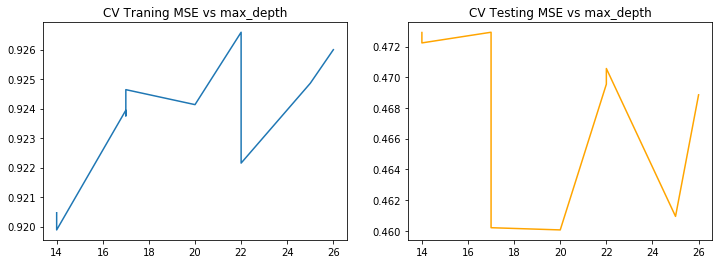

In [39]:
max_depth_cv = list(rf_grid.cv_results_['param_max_depth'].data)
df_depth_cv = pd.DataFrame(list(zip(max_depth_cv, rf_grid.cv_results_['mean_train_score'], rf_grid.cv_results_['mean_test_score'])), 
             columns=['max_depth','mean_train_score','mean_test_score']).sort_values('max_depth')

plt.subplots(figsize=(12, 4))
plt.subplot(121)

ax1=plt.subplot(1, 2, 1)
plt.plot(df_depth_cv['max_depth'], df_depth_cv['mean_train_score'])
plt.title('CV Traning MSE vs max_depth');

ax1=plt.subplot(1, 2, 2)
plt.plot(df_depth_cv['max_depth'], df_depth_cv['mean_test_score'], color = "orange")
plt.title('CV Testing MSE vs max_depth');

In [ ]:
# plt.subplots(figsize=(16, 5))
# plt.subplot(121)
# ax1=plt.subplot(1, 2, 1)

# plt.plot(rf_grid.cv_results_['mean_train_score'])
# plt.xticks(range(10), max_features_cv)
# plt.title('CV Traning MSE vs Mtry');


# ax1=plt.subplot(1, 2, 2)
# plt.plot(rf_grid.cv_results_['mean_test_score'],  color = "orange")
# plt.xticks(range(10), max_features_cv)
# plt.title('CV Testing MSE vs Mtry');

In [40]:
# use optimal hyperparameters
rf_cv = RandomForestRegressor(n_estimators=188, max_depth=17, max_features=8, random_state=10)
rf_cv.fit(X_train, Y_train)                         # fit

print("Random Forest R^2 training is: {}".format(rf_cv.score(X_train, Y_train)))                
print("Random Forest R^2 testing is: {}".format(rf_cv.score(X_test, Y_test))) 
print("Random Forest Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, rf_cv.predict(X_train)))))
print("Random Forest Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, rf_cv.predict(X_test)))))

Random Forest R^2 training is: 0.9248421103057463
Random Forest R^2 testing is: 0.45069386543950024
Random Forest Train RMSE is: 0.033379580050722016
Random Forest Test RMSE is: 0.09475258648928911


### Feature Importance

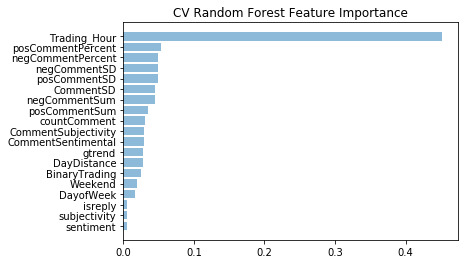

In [41]:
import pandas as pd
feature_importances = pd.DataFrame(rf_cv.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

y_pos = np.arange(len(X_train.columns))
plt.barh(y_pos, feature_importances.importance, align='center', alpha=0.5)
plt.yticks(y_pos, X_train.columns)
plt.title('CV Random Forest Feature Importance')
plt.show()

### 3. Xtreme Gradient Boosting

Parameter Reference: https://www.datacamp.com/community/tutorials/xgboost-in-python

Default Hyperparams:  
 - XGB Train RMSE is: 0.0627184664815691  
 - XGB Test RMSE is: 0.10047705976306533

In [ ]:
xgb = XGBRegressor(objective ='reg:linear', 
                   colsample_bytree = 0.3, 
                   learning_rate = 0.1,
                   max_depth = 5, 
                   alpha = 10, 
                   n_estimators = 40)

xgb.fit(X_train, Y_train)

print("XGB R^2 training is: {}".format(xgb.score(X_train, Y_train)))                

print("XGB Train RMSE is: {}".format(np.sqrt(mean_squared_error(Y_train, xgb.predict(X_train)))))
print("XGB Test RMSE is: {}".format(np.sqrt(mean_squared_error(Y_test, xgb.predict(X_test)))))

In [ ]:
modellist = [linear_reg, rf_cv,xgb]
modelname = ['log','rf','xgb']  

boot = [20,50,100]
from sklearn.metrics import mean_absolute_error

bootstrap = pd.DataFrame(columns=['size','model','mean','sd','CI','LB','UB'])
err = pd.DataFrame(columns=['size','model','mse'])
for n in boot:
    errors   = np.zeros((n, len(modellist)))
    
    for b in range(0,n):
        for i,model in enumerate(modellist):
            index = np.random.choice(list(range(0,len(X_test))),len(X_test), replace=True)
            errors[b,i] = np.sqrt(mean_squared_error(Y_test.iloc[index], model.predict(X_test.iloc[index])))
            err = err.append(pd.DataFrame([{'size': n, 'model' : modelname[i],'MSE' : errors[b,i]  }])) 
            
    bootstrapres = pd.DataFrame({'size': n, 'model' : modelname,'mean' : errors.mean(axis=0) ,'sd' : np.std(errors, axis=0)})
#     print(bootstrapres)
    bootstrapres['CI'] = [ 1.96* b[3] for _,b in bootstrapres.iterrows()]
    bootstrapres['LB'] = [b[2] - 1.96* b[3] for _,b in bootstrapres.iterrows()]
    bootstrapres['UB'] = [b[2] + 1.96* b[3] for _,b in bootstrapres.iterrows()]
    
    bootstrap = bootstrap.append(bootstrapres) 



In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(bootstrap)
import seaborn as sns
ax = sns.lineplot(x="size", y="MSE",
             hue="model",ci='sd', 
             data=err)
# ax.fill_between(bootstrap.size, bootstrap.LB, bootstrap.UB, color='#888888', alpha=0.2)

plt.show()